<a href="https://colab.research.google.com/github/BahPullo/Machine-learning-/blob/main/decision_tree_detail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Four steps to bulid model by using Scikit-learn

1. Load data and check shape(rows, features，label)
    - sklearn.datasets.load_xxx
    - pd.read_csv
    - data.shape (data need to be numpy array or pandas)
2. Split data (train) / (test)
    - train_test_split(data)
3. Build model. Using fit to train model 
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. Preidction.
Input(x_test) -> model(features) -> Output(Prediction) 
Evaluate prediction and label(y_test)
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [1]:
# step1
from sklearn.datasets import load_iris
# step2
from sklearn.model_selection import train_test_split
# step3
from sklearn.tree import DecisionTreeClassifier
# step4
from sklearn.metrics import accuracy_score


# 1. Load data and check shape(rows, features，label)

In [2]:
# read iris data
iris = load_iris()

In [3]:
# show data
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
# show data
# Input (feautre_names, data), Outcome (traget_names, target) 
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# Input
print(iris.feature_names)
print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [6]:
# Outcome
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# check the data shape (array) 
print("shape of data:", iris.data.shape)
print("shape of outcome:", iris.target.shape)

shape of data: (150, 4)
shape of outcome: (150,)


#2. Split data (train) / (test)

In [8]:
random_seed = 2 # set seed for same train test data split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.35, random_state=random_seed)

In [9]:
# y_train = outcome for x_train
print("shape of x_train: ", x_train.shape)
print("shape of y_train: ", y_train.shape)

shape of x_train:  (97, 4)
shape of y_train:  (97,)


In [10]:
# y_test = outcome for x_test
print("shape of x_test: ", x_test.shape)
print("shape of y_test: ", y_test.shape)

shape of x_test:  (53, 4)
shape of y_test:  (53,)


#3. Build model. Using fit to train model 

In [11]:
clf = DecisionTreeClassifier(
      criterion='gini', 
      max_depth=None, 
      min_samples_split=2, 
      min_samples_leaf=1)

In [12]:
# build model (y_train = outcome for x_train)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#4. Preidction.

In [13]:
y_pred = clf.predict(x_test)

In [14]:
# Prediction
y_pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0, 2, 0, 1, 0, 0, 0, 1, 2])

In [15]:
# Ground_truth, label
y_test

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0, 2, 0, 1, 0, 0, 0, 2, 2])

In [16]:
accuracy_score(y_test, y_pred)

0.9433962264150944

In [17]:
# feature_importances_
print(iris.feature_names)
print(clf.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.01550512 0.         0.05236836 0.93212653]


### visualize our tree

In [18]:
!pip install graphviz

In [19]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

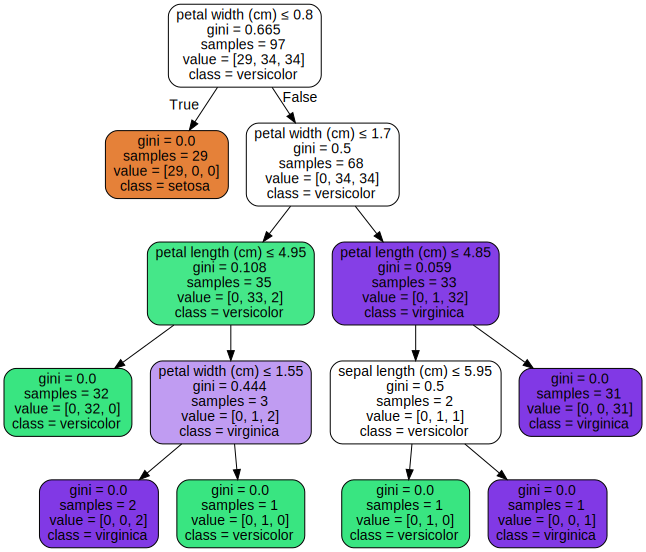

In [20]:
dot_data = export_graphviz(clf, out_file=None,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True, rounded=True,
          special_characters=True)  
graph = graphviz.Source(dot_data) 
graph